In [1]:
from google.colab import drive
drive.mount("/content/drive")
#!cd /content/drive/My Drive/
#drive.mount('/content/drive/My Drive/')

Mounted at /content/drive


In [21]:
!ls 
%cd drive/MyDrive/'Colab Notebooks'/deap_learning/part1
!ls

drive  sample_data
/content/drive/MyDrive/Colab Notebooks/deap_learning/part1
amazon_prc.ipynb  input_datas.npy  keras3.ipynb  output_datas.npy


In [26]:
from keras import models
from keras.layers import Input, Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [29]:
x = np.load('input_datas.npy')
y = np.load('output_datas.npy')

In [30]:
(train_x, test_x, train_y, test_y) = train_test_split(x,
                                                      y,
                                                      test_size = 0.2,
                                                      shuffle=True)

In [44]:
len(train_x[0])

300

In [51]:
def build_model():
    input_tensor = Input(shape = (300,))
    x = Dense(64, activation = 'relu')(input_tensor)
    y = Dense(64, activation = 'relu')(x)
    output_tensor = Dense(1, activation = 'relu')(y)
    model = models.Model(inputs=input_tensor, outputs=output_tensor)
    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [55]:
def build_model():
    input_tensor = Input(shape = (300,))
    x = Dense(64, activation = 'relu')(input_tensor)
    y = Dense(64, activation = 'relu')(x)
    output_tensor = Dense(1, activation = 'relu')(y)
    model = models.Model(inputs=input_tensor, outputs=output_tensor)
    model.compile(optimizer = 'rmsprop',
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [56]:
model = build_model()
history = model.fit(train_x,
                    train_y,
                    epochs = 40,
                    batch_size = 512,
                    validation_split = 0.1)

Epoch 1/40
91/91 [==============================] - 1s 5ms/step - loss: 8.9326 - mae: 2.5573 - val_loss: 1.1626 - val_mae: 0.8175
Epoch 2/40
91/91 [==============================] - 0s 4ms/step - loss: 1.1043 - mae: 0.8199 - val_loss: 0.9411 - val_mae: 0.7630
Epoch 3/40
91/91 [==============================] - 0s 4ms/step - loss: 0.9500 - mae: 0.7577 - val_loss: 0.8953 - val_mae: 0.7095
Epoch 4/40
91/91 [==============================] - 0s 4ms/step - loss: 0.8986 - mae: 0.7338 - val_loss: 0.8504 - val_mae: 0.7036
Epoch 5/40
91/91 [==============================] - 0s 4ms/step - loss: 0.8860 - mae: 0.7288 - val_loss: 0.8587 - val_mae: 0.6913
Epoch 6/40
91/91 [==============================] - 0s 4ms/step - loss: 0.8553 - mae: 0.7154 - val_loss: 0.8264 - val_mae: 0.7130
Epoch 7/40
91/91 [==============================] - 0s 4ms/step - loss: 0.8448 - mae: 0.7090 - val_loss: 0.8250 - val_mae: 0.6778
Epoch 8/40
91/91 [==============================] - 0s 3ms/step - loss: 0.8287 - mae: 0.70

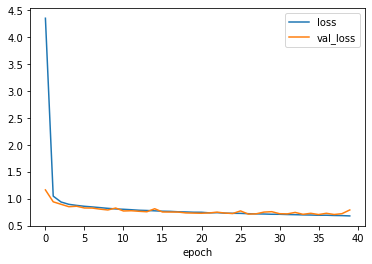

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()